In [1]:
import os
# print("Current directory:", os.getcwd())

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from plot_utils import set_plot_style, set_spines_black
set_plot_style(dpi=100)

In [3]:
# ---------------
# Parameters
# ---------------
alpha1,alpha2 = 1.5, 3
beta1,beta2 = 3, 1
K1=K2 = 0.5
n1=n2 = 8

# -------------------------
# Define the Vector field
# -------------------------
def v1(x1, x2):
    return alpha1-beta1*x1*(x2**n1)/(K1**n1 + x2**n1)

def v2(x1, x2):
    return alpha2*(1-x2)*(x1**n2)/(K2**n2 + x1**n2)-beta2*x2


In [4]:
# ----------------------------
# Create a  grid for quiver
# -----------------------------
pts = 20
x1 = np.linspace(0, 1, pts)
x2 = np.linspace(0, 1, pts)
X, Y = np.meshgrid(x1, x2)

# ---------------------------------------
# Compute the vector field and normalize it
# ---------------------------------------
U = v1(X, Y)
V = v2(X, Y)
resultant = np.hypot(U, V)
U_n = U/resultant
V_n = V/resultant

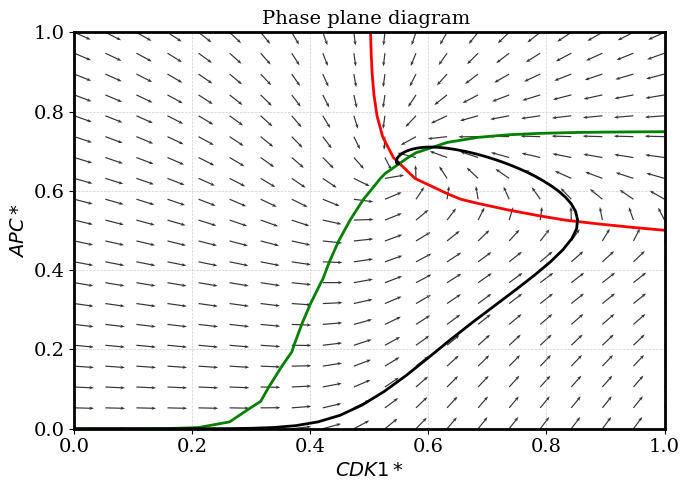

In [6]:
# -------------------
# # Initialize Figure
# -------------------
fig, ax = plt.subplots(figsize=(7, 5))

# Quiver for direction field
ax.quiver(
    X, Y, U_n, V_n,
    color='k',
    angles='xy',
    scale_units='xy',
    scale=30,
    width=0.002,
    headwidth=3,
    headlength=4,
    headaxislength=3,
    alpha=0.8
)

# Nullclines 
nc1 = ax.contour(
    X, Y, U, levels=[0],
    colors='red', linewidths=2
)
nc2 = ax.contour(
    X, Y, V, levels=[0],
    colors='green', linewidths=2
)

# A trajectory from (0,0)
def system(t, z):
    return [v1(z[0], z[1]), v2(z[0], z[1])]
# Integrate it
t_eval = np.linspace(0, 50, 2000)
solution = solve_ivp(system, [0, 50], [0.0, 0.0], t_eval=t_eval)
ax.plot(solution.y[0], solution.y[1], 'k', lw=2)

# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Phase plane diagram ', fontsize=14)
ax.set_xlabel('$CDK1*$', fontsize=14, fontweight='bold')
ax.set_ylabel('$APC*$', fontsize=14, fontweight='bold')
set_spines_black(ax)
plt.savefig("Plots_2/CDK1_APC_NullclinesPhaseplane.pdf", bbox_inches="tight")
plt.show()


In [ ]:
#***************************************************************************************************************************************************